# 국가별 음주 데이터 분석하기

## step1. 탐색: 데이터의 기초 정보 살펴보기

In [1]:
#라이브러리 임포트 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = '../data/drinks.csv' # 불러올 파일을 상대 경로를 지정, ../는 부모폴더 
drinks = pd.read_csv(file_path) # read_csv() 함수로 데이터를 데이터 프레임 형태로 불러옴
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [3]:
#파일을 위에서 10개만 보여줌
drinks.head(10) 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [4]:
# 피처의 통계형 수치적 정보 (갯수, 평균, 표준편차, 최소값, 최대값)
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## Step2. 인사이트의 발견: 탐색과 시각화하기
### 피처 간의 상관관계

## beer_servings, wine_servings 두 피처 간의 상관 계수 계산

1) 피어슨 상관계수(pearson correlation coefficient,PCC): 두 변수 X,Y 간의 선형 상관 관계를 계량화한 수치

corr() 함수로 피처 간의 상관 계수를 매트릭스(행렬, 숫자, 기호 등을 가로, 세로로 나열)형태로 출력할 수 있다

2) 스피어먼 상관계수: 두 변수 순위 사이의 통계적 의존성을 측정하는 비모수적인 척도

### 피처간의 상관 관계를 통계적으로 탐색하는 방법
- 단순 상관 분석방법: 피처가 2개 일때 상관 계수를 계산하는 방법
- 다중 상관 분석 방법: 피처가 여러 개일 때 상호간의 연관성을 분석하는 방법


In [5]:
#단순 상관 분석방법 
#beer_servings', 'wine_servings 두 개의 상관관계
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
corr



,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


여러 피처의  상관관계 분석하기
피처 간의 상관 계수 행렬을 구한다


In [6]:
# 다중 상관 분석방법
corr1=drinks.corr(method='pearson') #피어슨
#corr1=[['beer_servings', spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']].corr(method ='pearson')
#drinks.corr(method='spearman') #스피어만
corr1

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


## [seaborn 시각화 라이브러리 활용]

### - 히트맵(heatmap), 페어플롯(pairplot)기법 사용하기
### - 히트맵: 히트와 지도를 뜻하는 맵을 결합시킨 단어로 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지 위에 열분포 형태의 그래픽으로 출력

In [7]:
!pip install seaborn #seaborn 설치 

ERROR: Invalid requirement: '#seaborn'


In [8]:
#seaborn 임포트 
import seaborn as sns 
import matplotlib.pyplot as plt

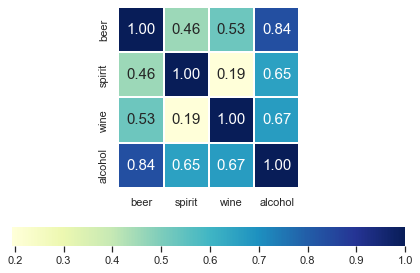

In [9]:
#set() 폰트 사이즈 지정 
sns.set(font_scale = 1) #label 폰트의 크기 
# 그래프 출력을 위한 cols의 이름 지정 
cols_view = ['beer', 'spirit', 'wine', 'alcohol']
# seaborn의 hearmap(),의 파라미터1번째는 어떤 값을 가져오는지 그 다음은 형태 
hm = sns.heatmap(corr1.values, #히트맵에 출력하고자 하는 값(다중상관 관계 프레임값)
           cbar = True, # 히트맵 오른쪽 바 표시 
           annot = True, #네모 위의 값 표시(상관계수 출력 여부)
           square = True, #사각형의 형태(True 는 정사각형 False는 직사각형 )
           fmt = '.2f', #소숫점 자릿수, 두 자리까지 표시 
           annot_kws = {'size':15}, #사각형 안 글자 크기(상관계수 폰트 크기)
           yticklabels = cols_view, # cols_view가 y을 레이블명
           xticklabels = cols_view, # cols_view가 x을 레이블명
            linewidths= 1.5, # 상관 변수 사이에 흰색 선
            cmap="YlGnBu", # 컬러맵 
           cbar_kws={"orientation": "horizontal"}) #cbar를 가로로 표시 

plt.tight_layout()
plt.show()

## -pairplot 그래프 
## 페어플롯은 데이터 프레임을 파라미터로 넣어줌


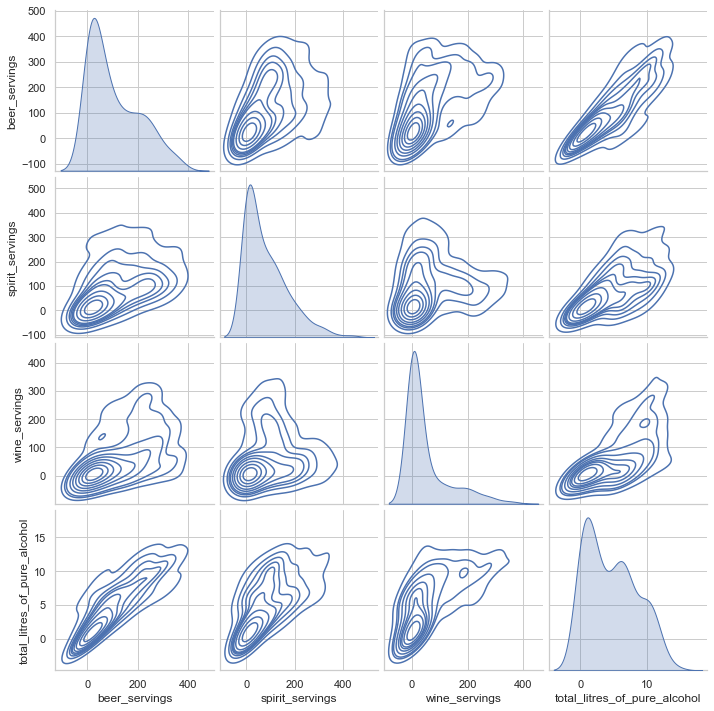

In [10]:
#피처 간의 산점도 그래프 출력
#set() 함수는 seaborn 플롯의 테마 및 구성을 제어하는 데 사용

#페어플롯은 데이터 프레임을 파라미터로 넣어줌 
#style: darkgrid, whitegrid, dark, white,ticks : 이미지의 전반적인 모양을 스타일링, 5가지 스타일 지원 
#context: paper, notebook, talk, poster  : 어떤 상황에서 보여줄 것인가에 따라 4종류의 텍스트 스케일 지원

sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5, kind = 'kde')
plt.show()

### 인사이트 도출 1. 대륙별 평균 wine_servings 탐색

In [25]:
#대륙별 평균을 구한 후 wine_servings 인사이트 도출
wineAve = drinks.groupby('continent').mean()['wine_servings'] #방법1
wineAve
#wineAve = drinks.groupby('continent')['wine_servings'].mean() #방법2 

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

### 인사이트 도출2. 전체 평균보다 적은 알코올을 섭취하는 대륙



In [35]:
#대륙 알콜 평균(totalmean) 과  대륙별 알콜 전체 섭취량(continent_mean) 비교
totalmean = drinks.total_litres_of_pure_alcohol.mean()

continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
#continent_mean = drinks.groupby('continent').mean()['total_litres_of_pure_alcohol']

#index.tolist()  인덱스만 추출해서 리스트로 만드는 함수 
# 대륙 알콜 평균이 전체 평균보다 작은 값의 인덱스만 뽑아서 리스트로 만들어서 continent_under_mean 에 담기 
continent_under_mean = continent_mean[continent_mean < totalmean].index.tolist()

#values.tolist() 값을 추출해서 리스트로 만드는 함수 
continent_under_mean = continent_mean[continent_mean < totalmean].values.tolist()
continent_under_mean

[3.0075471698113208, 2.1704545454545454, 3.38125]